In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
import pandas as pd
from PIL import Image

In [2]:
#加载图片
pic=Image.open("oil.jpg")
w, h, d = pic.size[0], pic.size[1], 3
print('width=', w, 'height=', h)
oil= np.array(pic.getdata()).reshape(h, w, 3)
oil_array=oil.reshape((w*h,3))
pd.DataFrame(oil_array).drop_duplicates().shape

width= 737 height= 517


(97655, 3)

Fitting model on a small sub-sample of the data
Predicting color indices on the full image (k-means)
Predicting color indices on the full image (random)


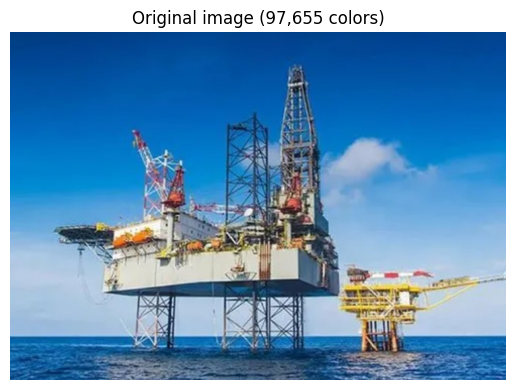

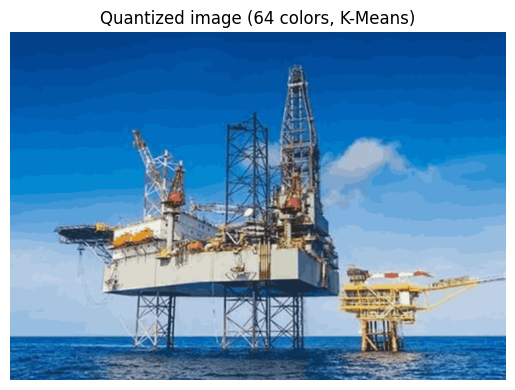

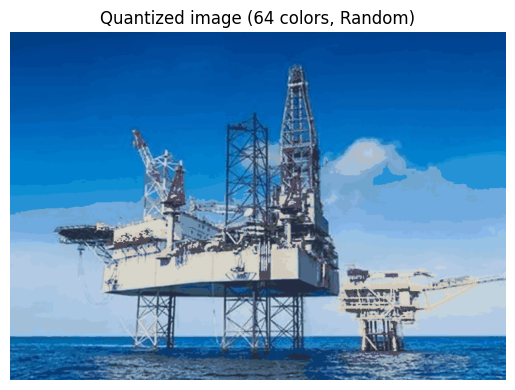

In [3]:
n_colors = 64
oil_array = np.array(oil_array, dtype=np.float64) / 255.0

#K-means建模，利用图像的部分颜色数据（10000个）寻找64个质心
print("Fitting model on a small sub-sample of the data")
oil_array_sample = shuffle(oil_array, random_state=0, n_samples=10000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(oil_array_sample)
codebook = kmeans.cluster_centers_
print("Predicting color indices on the full image (k-means)")
labels = kmeans.predict(oil_array)

#随机抽取64个质心
codebook_random = shuffle(oil_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
labels_random = pairwise_distances_argmin(codebook_random, oil_array, axis=0)

#绘制原始图像
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (97,655 colors)")
plt.imshow(pic)
#绘制K-Means压缩后图像
plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")

codebook = kmeans.cluster_centers_
recreate_image = codebook[labels].reshape(h, w, -1)
pil_img = Image.fromarray(np.uint8(recreate_image*255.0))
plt.imshow(pil_img)
plt.show()
#绘制随机抽取质心压缩后图像
plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")

recreate_image = codebook_random[labels_random].reshape(h, w, -1)
pil_img = Image.fromarray(np.uint8(recreate_image*255.0))
plt.imshow(pil_img)
plt.show()